In [4]:
import pickle
import pandas as pd
from pandas import Series
from tqdm import tqdm
import seaborn as sns

import matplotlib
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import font_manager as fm
from matplotlib import rc

matplotlib.rcParams['figure.dpi'] = 150
f_path = "/System/Library/Fonts/Helvetica.ttc"
font_name = fm.FontProperties(fname=f_path).get_name()
rc('font', family=font_name, size=13)

### Full data statictics

In [7]:
df_voter = pd.read_pickle("../dataset/02_ddo_initial_filtering/df_voter_full.p")

In [8]:
df_voter.head()

debate_key                          debate_title  \
0  .-.-.-Ha-YOURE-GOING-DOWN-BEEM0R/1/  . . . Ha! YOU'RE GOING DOWN, BEEM0R!   
1  .-.-.-Ha-YOURE-GOING-DOWN-BEEM0R/1/  . . . Ha! YOU'RE GOING DOWN, BEEM0R!   
2  .-.-.-Ha-YOURE-GOING-DOWN-BEEM0R/1/  . . . Ha! YOU'RE GOING DOWN, BEEM0R!   
3  .-.-.-Ha-YOURE-GOING-DOWN-BEEM0R/1/  . . . Ha! YOU'RE GOING DOWN, BEEM0R!   
4  .-.-.-Ha-YOURE-GOING-DOWN-BEEM0R/1/  . . . Ha! YOU'RE GOING DOWN, BEEM0R!   

  debate_date      voter_name voter_position  debate_id stance  \
0  2009-02-02     Cliff.Stamp            Tie          0  0_Tie   
1  2009-02-02           jat93            Con          0  0_Con   
2  2009-02-02  Logical-Master            Tie          0  0_Tie   
3  2009-02-02         Kleptin            Tie          0  0_Tie   
4  2009-02-02        Tatarize            Tie          0  0_Tie   

                 debate_title_stance_debateidx  \
0  Tie_. . . Ha! YOU'RE GOING DOWN, BEEM0R![0]   
1  Con_. . . Ha! YOU'RE GOING DOWN, BEEM0R![0]   
2  Tie_. . . Ha! YOU'RE GOING DOWN, BEEM0R![0]   
3  Tie_. . . Ha! YOU'RE GOING DOWN, BEEM0R![0]   
4  Tie_. . . Ha! YOU'RE GOING DOWN, BEEM0R![0]   

                        debate_title_stance  
0  Tie_. . . Ha! YOU'RE GOING DOWN, BEEM0R!  
1  Con_. . . Ha! YOU'RE GOING DOWN, BEEM0R!  
2  Tie_. . . Ha! YOU'RE GOING DOWN, BEEM0R!  
3  Tie_. . . Ha! YOU'RE GOING DOWN, BEEM0R!  
4  Tie_. . . Ha! YOU'RE GOING DOWN, BEEM0R!

In [12]:
print('data size:', len(df_voter))
print('num debates:', len(df_voter['debate_key'].unique()))
print('num debate title:', len(df_voter['debate_title'].unique()))
print('num users:', len(df_voter['voter_name'].unique()))
print('average participation:', len(df_voter)/len(df_voter['voter_name'].unique())  )

data size: 199210
num debates: 48887
num debate title: 43575
num users: 9076
average participation: 21.949096518289995


### Vote data

In [4]:
df_vote    = pd.read_pickle('../dataset/02_ddo_initial_filtering/df_voter_full_notie_essential.p')
df_vote.columns = ['debate_key', 'debate_title',  'debate_date', 'username', 'position']
df_vote.head()

debate_key                          debate_title  \
1  .-.-.-Ha-YOURE-GOING-DOWN-BEEM0R/1/  . . . Ha! YOU'RE GOING DOWN, BEEM0R!   
5  .-.-.-Ha-YOURE-GOING-DOWN-BEEM0R/1/  . . . Ha! YOU'RE GOING DOWN, BEEM0R!   
6  .-.-.-Ha-YOURE-GOING-DOWN-BEEM0R/1/  . . . Ha! YOU'RE GOING DOWN, BEEM0R!   
7  .-.-.-Ha-YOURE-GOING-DOWN-BEEM0R/1/  . . . Ha! YOU'RE GOING DOWN, BEEM0R!   
8  .-.-.-Ha-YOURE-GOING-DOWN-BEEM0R/1/  . . . Ha! YOU'RE GOING DOWN, BEEM0R!   

  debate_date        username position  
1  2009-02-02           jat93      Con  
5  2009-02-02    philosphical      Pro  
6  2009-02-02    rougeagent21      Pro  
7  2009-02-02  Wii_Master_Nin      Con  
8  2009-02-02       NYCDiesel      Pro

In [3]:
df_vote.to_pickle('../data/02_ddo_initial_filtering/df_voter_full_notie_essential_formatted.p')

In [16]:
print('data size:', len(df_vote))
print('num debates:', len(df_vote['debate_key'].unique()))
print('num debate title:', len(df_vote['debate_title'].unique()))
print('num users:', len(df_vote['username'].unique()))


data size: 75939
num debates: 29009
num debate title: 26014
num users: 5736


In [17]:
vote_participation_counts = df_vote['username'].value_counts().values

### Debater data

In [8]:
df_debater = pd.read_pickle('../dataset/02_ddo_initial_filtering/df_debaters.p')
df_debater.head()

debate_key  \
0                .-.-.-Ha-YOURE-GOING-DOWN-BEEM0R/1/   
1  .-Audis-are-junkers-except-to-rich-kids-with-l...   
2  ....-Former-Secretary-of-State-Madeleine-Albri...   
3                     ...Words-can-t-hurt-me-any./1/   
4                      .9-repeated-is-equal-to-1./1/   

                                        debate_title         pro_user  \
0               . . . Ha! YOU'RE GOING DOWN, BEEM0R!   Logical-Master   
1  . Audis are junkers, except to rich kids with ...      Max.Wallace   
2  ...."Former Secretary of State Madeleine Albri...  Lookingatissues   
3                        ...Words can't hurt me any.     NonInDelicto   
4                         .9 repeated is equal to 1.       cowpie1998   

              con_user start_date       category  
0               beem0r 2009-02-02  Miscellaneous  
1      TheCalmCanadian 2014-09-04           Cars  
2          Tide_Bleach 2017-01-30       Politics  
3          debaterjake 2007-12-19        Society  
4  Extremely-Far-Right 2011-04-07        Science

In [10]:
print('data size:', len(df_debater))
print('num debates:', len(df_debater['debate_key'].unique()))
print('num debate title:', len(df_debater['debate_title'].unique()))

data size: 78376
num debates: 78345
num debate title: 68900


In [11]:
all_debaters = df_debater['pro_user'].to_list() + df_debater['con_user'].to_list()
all_debaters = Series(all_debaters)
print("num unique users (debaters):", len(all_debaters.unique()))

num unique users (debaters): 42906


In [12]:
debate_participation_counts = all_debaters.value_counts().values

In [13]:
sum(debate_participation_counts)

156752

In [14]:
156752/42906

3.653381811401669

### Comparison

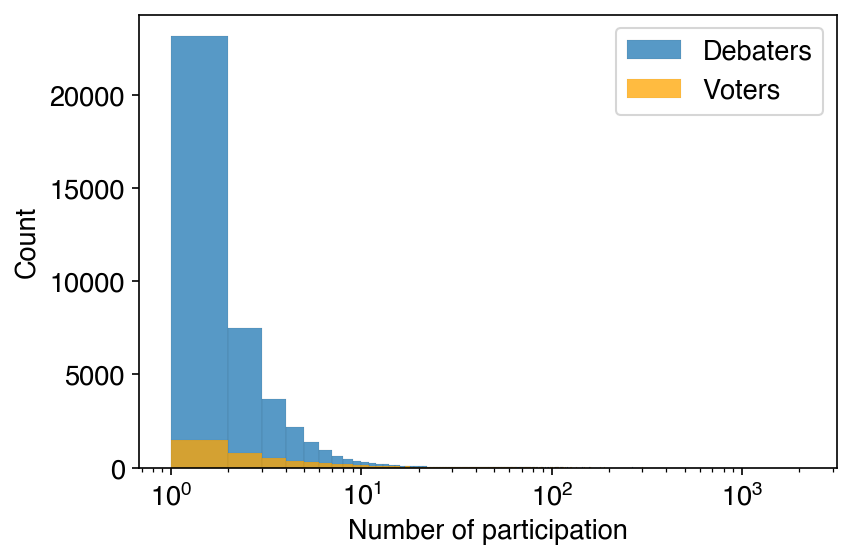

In [18]:
fig, ax = plt.subplots()
sns.histplot(debate_participation_counts, label='Debaters', binwidth=1, ax=ax)
sns.histplot(vote_participation_counts, label='Voters', binwidth=1, ax=ax, color='orange')

plt.xlabel('Number of participation')
plt.xscale('log')
plt.legend()

plt.savefig('../fig/dataprocess/voter_vs_debater_(logx).pdf', transparent=True, bbox_inches='tight')

## Integration of two dataset

In [19]:
df_vote.head()

debate_key                          debate_title  \
1  .-.-.-Ha-YOURE-GOING-DOWN-BEEM0R/1/  . . . Ha! YOU'RE GOING DOWN, BEEM0R!   
5  .-.-.-Ha-YOURE-GOING-DOWN-BEEM0R/1/  . . . Ha! YOU'RE GOING DOWN, BEEM0R!   
6  .-.-.-Ha-YOURE-GOING-DOWN-BEEM0R/1/  . . . Ha! YOU'RE GOING DOWN, BEEM0R!   
7  .-.-.-Ha-YOURE-GOING-DOWN-BEEM0R/1/  . . . Ha! YOU'RE GOING DOWN, BEEM0R!   
8  .-.-.-Ha-YOURE-GOING-DOWN-BEEM0R/1/  . . . Ha! YOU'RE GOING DOWN, BEEM0R!   

  debate_date        username position  
1  2009-02-02           jat93      Con  
5  2009-02-02    philosphical      Pro  
6  2009-02-02    rougeagent21      Pro  
7  2009-02-02  Wii_Master_Nin      Con  
8  2009-02-02       NYCDiesel      Pro

In [20]:
df_debater.head()

debate_key  \
0                .-.-.-Ha-YOURE-GOING-DOWN-BEEM0R/1/   
1  .-Audis-are-junkers-except-to-rich-kids-with-l...   
2  ....-Former-Secretary-of-State-Madeleine-Albri...   
3                     ...Words-can-t-hurt-me-any./1/   
4                      .9-repeated-is-equal-to-1./1/   

                                        debate_title         pro_user  \
0               . . . Ha! YOU'RE GOING DOWN, BEEM0R!   Logical-Master   
1  . Audis are junkers, except to rich kids with ...      Max.Wallace   
2  ...."Former Secretary of State Madeleine Albri...  Lookingatissues   
3                        ...Words can't hurt me any.     NonInDelicto   
4                         .9 repeated is equal to 1.       cowpie1998   

              con_user start_date       category  
0               beem0r 2009-02-02  Miscellaneous  
1      TheCalmCanadian 2014-09-04           Cars  
2          Tide_Bleach 2017-01-30       Politics  
3          debaterjake 2007-12-19        Society  
4  Extremely-Far-Right 2011-04-07        Science

In [21]:
#change format similar to the voter data
df_debater_pro = df_debater[['debate_key', 'debate_title', 'pro_user', 'start_date']]
df_debater_pro['position'] = 'Pro'
df_debater_pro.columns = ['debate_key', 'debate_title', 'username', 'debate_date', 'position']

df_debater_con = df_debater[['debate_key', 'debate_title', 'con_user', 'start_date']]
df_debater_con['position'] = 'Con'
df_debater_con.columns = ['debate_key', 'debate_title', 'username', 'debate_date', 'position']

/var/folders/r8/jdw1p2tj6jn34wf676kcsw_r0000gn/T/ipykernel_75299/2895185664.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_debater_pro['position'] = 'Pro'
/var/folders/r8/jdw1p2tj6jn34wf676kcsw_r0000gn/T/ipykernel_75299/2895185664.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_debater_con['position'] = 'Con'


In [22]:
df_debater_concat = pd.concat([df_debater_pro, df_debater_con], axis=0) 
print(len(df_debater_concat))
df_debater_concat.head()

156752


debate_key  \
0                .-.-.-Ha-YOURE-GOING-DOWN-BEEM0R/1/   
1  .-Audis-are-junkers-except-to-rich-kids-with-l...   
2  ....-Former-Secretary-of-State-Madeleine-Albri...   
3                     ...Words-can-t-hurt-me-any./1/   
4                      .9-repeated-is-equal-to-1./1/   

                                        debate_title         username  \
0               . . . Ha! YOU'RE GOING DOWN, BEEM0R!   Logical-Master   
1  . Audis are junkers, except to rich kids with ...      Max.Wallace   
2  ...."Former Secretary of State Madeleine Albri...  Lookingatissues   
3                        ...Words can't hurt me any.     NonInDelicto   
4                         .9 repeated is equal to 1.       cowpie1998   

  debate_date position  
0  2009-02-02      Pro  
1  2014-09-04      Pro  
2  2017-01-30      Pro  
3  2007-12-19      Pro  
4  2011-04-07      Pro

In [115]:
df_debater_concat.to_pickle('../data/02_ddo_initial_filtering/df_debater_formatted.p')

### Merge two debaters and voters data

In [24]:
df_combined = pd.concat([df_debater_concat, df_vote], axis=0)
df_combined

debate_key  \
0                     .-.-.-Ha-YOURE-GOING-DOWN-BEEM0R/1/   
1       .-Audis-are-junkers-except-to-rich-kids-with-l...   
2       ....-Former-Secretary-of-State-Madeleine-Albri...   
3                          ...Words-can-t-hurt-me-any./1/   
4                           .9-repeated-is-equal-to-1./1/   
...                                                   ...   
199201                                            zoos/1/   
199205                          zygote-is-not-A-person/1/   
199206                          zygote-is-not-A-person/1/   
199207                          zygote-is-not-A-person/1/   
199208                          zygote-is-not-A-person/1/   

                                             debate_title          username  \
0                    . . . Ha! YOU'RE GOING DOWN, BEEM0R!    Logical-Master   
1       . Audis are junkers, except to rich kids with ...       Max.Wallace   
2       ...."Former Secretary of State Madeleine Albri...   Lookingatissues   
3                             ...Words can't hurt me any.      NonInDelicto   
4                              .9 repeated is equal to 1.        cowpie1998   
...                                                   ...               ...   
199201                                               zoos         RoyLatham   
199205                             zygote is not A person  progressivedem22   
199206                             zygote is not A person            saxman   
199207                             zygote is not A person   CynicalDiogenes   
199208                             zygote is not A person    black_squirrel   

       debate_date position  
0       2009-02-02      Pro  
1       2014-09-04      Pro  
2       2017-01-30      Pro  
3       2007-12-19      Pro  
4       2011-04-07      Pro  
...            ...      ...  
199201  2009-05-18      Pro  
199205  2014-01-30      Pro  
199206  2014-01-30      Con  
199207  2014-01-30      Con  
199208  2014-01-30      Pro  

[232691 rows x 5 columns]

In [ ]:
df_combined.to_pickle('../data/02_ddo_initial_filtering/df_debater_vote_merged.p')

In [24]:
df_combined = pd.read_pickle('../data/02_ddo_initial_filtering/df_debater_vote_merged.p')

In [25]:
df_combined.head()

debate_key  \
0                .-.-.-Ha-YOURE-GOING-DOWN-BEEM0R/1/   
1  .-Audis-are-junkers-except-to-rich-kids-with-l...   
2  ....-Former-Secretary-of-State-Madeleine-Albri...   
3                     ...Words-can-t-hurt-me-any./1/   
4                      .9-repeated-is-equal-to-1./1/   

                                        debate_title         username  \
0               . . . Ha! YOU'RE GOING DOWN, BEEM0R!   Logical-Master   
1  . Audis are junkers, except to rich kids with ...      Max.Wallace   
2  ...."Former Secretary of State Madeleine Albri...  Lookingatissues   
3                        ...Words can't hurt me any.     NonInDelicto   
4                         .9 repeated is equal to 1.       cowpie1998   

  debate_date position  
0  2009-02-02      Pro  
1  2014-09-04      Pro  
2  2017-01-30      Pro  
3  2007-12-19      Pro  
4  2011-04-07      Pro

In [27]:
print('data size:', len(df_combined))
print('num debates:', len(df_combined['debate_key'].unique()))
print('num debate title:', len(df_combined['debate_title'].unique()))
print('num users:', len(df_combined['username'].unique()))
print('average participation:', len(df_combined)/len(df_combined['username'].unique())  )

data size: 232691
num debates: 78362
num debate title: 68900
num users: 44510
average participation: 5.227836441249157


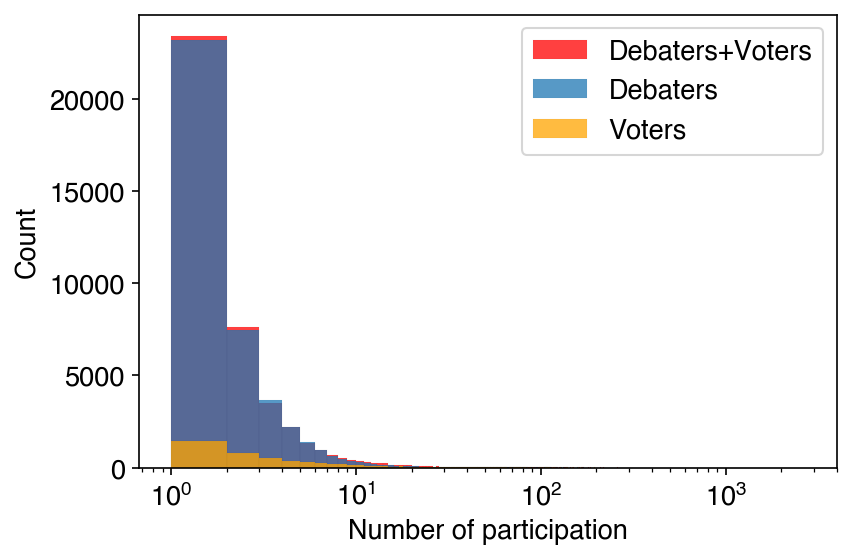

In [39]:
plt.figure()
sns.histplot(df_combined['username'].value_counts().values, label='Debaters+Voters',color='r', binwidth=1)
sns.histplot(debate_participation_counts, label='Debaters', binwidth=1)
sns.histplot(vote_participation_counts, label='Voters', binwidth=1, color='orange')

plt.xlabel('Number of participation')
plt.xscale('log')
plt.legend()
plt.savefig('../fig/dataprocess/number_of_participation_voter_debater_(logx).pdf',transparent=True, bbox_inches='tight')

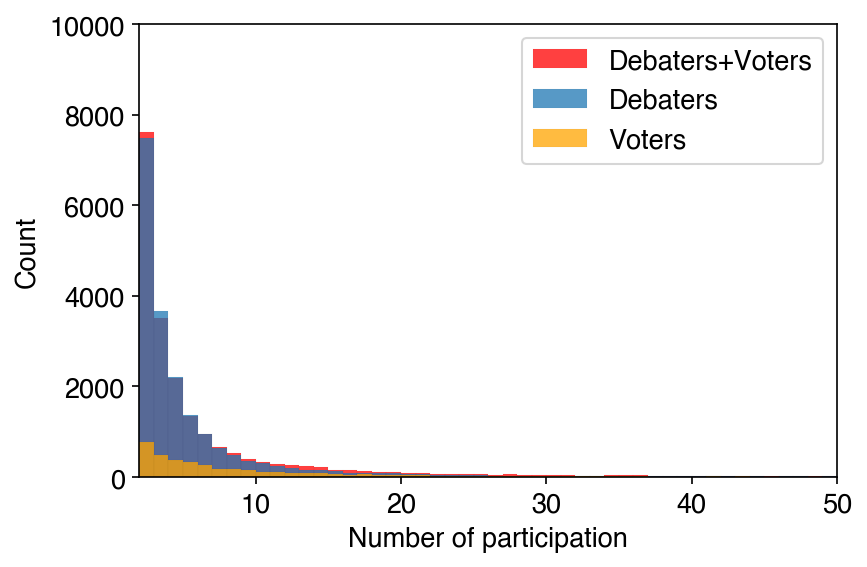

In [40]:
plt.figure()
sns.histplot(df_combined['username'].value_counts().values, label='Debaters+Voters',color='r', binwidth=1)
sns.histplot(debate_participation_counts, label='Debaters', binwidth=1)
sns.histplot(vote_participation_counts, label='Voters', binwidth=1, color='orange')

plt.xlabel('Number of participation')
plt.xlim(2,50)
plt.ylim(0,10000)
plt.legend()
plt.savefig('../fig/dataprocess/number_of_participation_voter_debater_(linearx).pdf', transparent=True, bbox_inches='tight')

In [160]:
user_up2 = df_combined['username'].value_counts()[(df_combined['username'].value_counts() != 1)]
user_up2.keys()
print('# User with records more than 2:', len(user_up2.keys()))
user_up2_list = list(user_up2.keys())

# User with records more than 2: 21113


In [162]:
df_combined_userup2 = df_combined[df_combined['username'].isin(user_up2.keys())]
df_combined_userup2

debate_key  \
0                     .-.-.-Ha-YOURE-GOING-DOWN-BEEM0R/1/   
1       .-Audis-are-junkers-except-to-rich-kids-with-l...   
2       ....-Former-Secretary-of-State-Madeleine-Albri...   
4                           .9-repeated-is-equal-to-1./1/   
5                                 .99-is-equal-to-one./1/   
...                                                   ...   
199201                                            zoos/1/   
199205                          zygote-is-not-A-person/1/   
199206                          zygote-is-not-A-person/1/   
199207                          zygote-is-not-A-person/1/   
199208                          zygote-is-not-A-person/1/   

                                             debate_title          username  \
0                    . . . Ha! YOU'RE GOING DOWN, BEEM0R!    Logical-Master   
1       . Audis are junkers, except to rich kids with ...       Max.Wallace   
2       ...."Former Secretary of State Madeleine Albri...   Lookingatissues   
4                              .9 repeated is equal to 1.        cowpie1998   
5                                    .99 is equal to one.  SweetCrackerJack   
...                                                   ...               ...   
199201                                               zoos         RoyLatham   
199205                             zygote is not A person  progressivedem22   
199206                             zygote is not A person            saxman   
199207                             zygote is not A person   CynicalDiogenes   
199208                             zygote is not A person    black_squirrel   

       debate_date position  
0       2009-02-02      Pro  
1       2014-09-04      Pro  
2       2017-01-30      Pro  
4       2011-04-07      Pro  
5       2013-12-24      Pro  
...            ...      ...  
199201  2009-05-18      Pro  
199205  2014-01-30      Pro  
199206  2014-01-30      Con  
199207  2014-01-30      Con  
199208  2014-01-30      Pro  

[209294 rows x 5 columns]

In [165]:
print('data size:', len(df_combined_userup2))
print('num debates:', len(df_combined_userup2['debate_key'].unique()))
print('num debate title:', len(df_combined_userup2['debate_title'].unique()))
print('num users:', len(df_combined_userup2['username'].unique()))

data size: 209294
num debates: 76925
num debate title: 67686
num users: 21113


In [166]:
df_combined_userup2.to_pickle('../data/02_ddo_initial_filtering/df_debater_vote_merged_userup2.p')

In [174]:
for i in range(420,500):
    print(df_combined_userup2['debate_title'].iloc[i])

A border fence is useless
a box that can never be opened is empty
A breakdown in communication create segregation within our existence creators name.
A Brutal Research Made On Fungi
A business should not be forced to pay for maternity leave because pregnancies should be planned.
A Canadian-style National Healthcare system would be a good thing for the United States to have.
A Canal Should be Built on the Mexican-U.S Border
A candidates religious beliefs should be considered when choosing whom to vote for in political race
"A cap on your costs, but no cap on your benefit." - Nancy Pelosi
A capella is the correct form of worship
A capella music is the correct form of worship
A capitilist societs is better then a socialist one
A Carbon Tax Should be Implemented in The United States.
A career in pornography should be a more ethically respectable one than one in politics.
A carpet mat can burn lightning with enough heat.
A caveman would beat an astronaut in an unarmed fight to the death
A c